<a href="https://colab.research.google.com/github/hantswilliams/HHA-507-2022/blob/main/autoML/autoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Pacakges

In [2]:
!pip install tpot mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.9 MB/s 
     |████████████████████████████████| 112 kB 21.2 MB/s 
     |████████████████████████████████| 255.9 MB 48 kB/s 
     |████████████████████████████████| 139 kB 49.3 MB/s 
     |████████████████████████████████| 2.0 MB 27.0 MB/s 
     |████████████████████████████████| 76.8 MB 1.2 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 569 kB 67.5 MB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 348 kB 45.3 MB/s 
     |████████████████████████████████| 81 kB 6.9 MB/s 
     |████████████████████████████████| 209 kB 30.6 MB/s 
     |████████████████████████████████| 78 kB 9.7 MB/s 
     |████████████████████████████████| 50 kB 2.8 MB/s 
     |████████████████████████████████| 112 kB 60.2 MB/s 
     |████████████████████████████████| 147

# Options Available

- mode — the package ships with four built-in models. 
  - The Explain mode is ideal for explaining and understanding the data. It results in visualizations of feature importance as well as tree visualizations.
  - The Perform is used when building ML models for production. 
  - The Compete is meant to build models used in machine learning competitions. 
  - The Optuna mode is used to search for highly-tuned ML models.
- algorithms — specifies the algorithms you would like to use. They are usually passed in as a list.
- results_path — the path where the results will be stored
- total_time_limit — the total time in seconds for training the model
- train_ensemble — dictates if an ensemble will be created at the end of the training process
- stack_models — determines if a models stack will be created
- eval_metric — the metric that will be optimized. If auto the logloss is used for classification problems while the rmse is used for regression problems

In [51]:
#automl = AutoML(
    # mode="Explain"
    # algorithms=""
    # results_path="AutoML_22",
    # total_time_limit=30 * 60,
    # train_ensemble=True,
    # stack_models="",
    # eval_metric=""
#)

# Healthcare Dataset - SPARCS

## Load in dataset

In [77]:
import pandas as pd
sparcs = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA-507-2022/main/autoML/datasets/data_sparcs.csv')
sparcs

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,4757.01,4747.83
1,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,18 to 29,148,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,Self-Pay,0,N,N,5090.25,2985.64
2,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,0 to 17,147,M,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,Self-Pay,Self-Pay,2900,N,N,4948.50,2129.67
3,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,148,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Self-Pay,0,N,Y,4719.75,8454.41
4,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,M,White,Not Span/Hispanic,...,Major,Medical,Blue Cross/Blue Shield,Medicare,Self-Pay,0,N,Y,50384.75,34565.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23578,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,50833.00,8961.40
23579,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,0 to 17,117,F,Other Race,Spanish/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,3200,N,N,10948.00,2214.06
23580,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,30 to 49,117,M,White,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,46421.00,11083.24
23581,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Major,Medical,Medicare,Medicare,NaN,0,N,Y,46122.00,7951.26


In [69]:
sparcs.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

## Potential variables of interest

- APR Risk of Mortality (categorical) 
- Total costs (continuous) 
- Length of Stay

In [70]:
sparcs['Length of Stay'].describe()

count     23583
unique       97
top           2
freq       5378
Name: Length of Stay, dtype: object

In [71]:
sparcs['Total Costs'].describe()

count    2.358300e+04
mean     1.472282e+04
std      2.718098e+04
min      6.700000e-01
25%      4.471700e+03
50%      8.320120e+03
75%      1.590874e+04
max      1.591541e+06
Name: Total Costs, dtype: float64

In [72]:
sparcs['APR Risk of Mortality'].value_counts()

Minor       13990
Moderate     4952
Major        3452
Extreme      1187
Name: APR Risk of Mortality, dtype: int64

## Create some simplified binary versions

In [78]:
sparcs['Length of Stay'] = pd.to_numeric(sparcs['Length of Stay'], errors='coerce')
sparcs['sparcs_los'] = sparcs['Length of Stay'].apply(lambda x: 'long' if x > 3 else 'short')
sparcs.drop('Length of Stay', axis=1, inplace=True)
sparcs['sparcs_los'].value_counts()


short    13008
long     10575
Name: sparcs_los, dtype: int64

# MLJar Examples

## Binary Classifier Example 1 - SPARCS

### **Create new model**

In [79]:
X = sparcs.drop(columns=['sparcs_los'])

In [80]:
y = sparcs["sparcs_los"]

In [81]:
X

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,4757.01,4747.83
1,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,18 to 29,148,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,Self-Pay,0,N,N,5090.25,2985.64
2,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,0 to 17,147,M,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,Self-Pay,Self-Pay,2900,N,N,4948.50,2129.67
3,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,148,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Self-Pay,0,N,Y,4719.75,8454.41
4,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,M,White,Not Span/Hispanic,...,Major,Medical,Blue Cross/Blue Shield,Medicare,Self-Pay,0,N,Y,50384.75,34565.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23578,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,50833.00,8961.40
23579,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,0 to 17,117,F,Other Race,Spanish/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,3200,N,N,10948.00,2214.06
23580,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,30 to 49,117,M,White,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,46421.00,11083.24
23581,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Major,Medical,Medicare,Medicare,NaN,0,N,Y,46122.00,7951.26


In [82]:
y

0        short
1        short
2        short
3        short
4         long
         ...  
23578     long
23579    short
23580     long
23581     long
23582     long
Name: sparcs_los, Length: 23583, dtype: object

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [85]:
automl = AutoML(
    results_path="sparcs_binary_los",
    mode="Explain"
)

In [86]:
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: sparcs_binary_los
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.687821 trained in 1.39 seconds
2_DecisionTree logloss 0.431098 trained in 16.27 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 0.244482 trained in 32.3 seconds
4_Default_NeuralNetwork logloss 0.376986 trained in 9.67 seconds
5_Default_RandomForest logloss 0.375043 trained in 19.61 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.244482 trained in 1.55 seconds
AutoML fit time: 92.59 seconds
AutoML best model: 3_Default_Xgboost


AutoML(results_path='sparcs_binary_los')

In [87]:
pred = automl.predict(X_test)
pred

array(['short', 'short', 'short', ..., 'short', 'short', 'short'],
      dtype=object)

In [ ]:
automl.report()

### **Test new (not really) data**

In [113]:
# load in the data model 

automl_sparcs_los = AutoML(results_path="sparcs_binary_los")

In [125]:
# create a new dataset that follows the same data structure as the training set
X_withlos = sparcs.sample(5)
X_withoutlos = X_withlos.drop(columns=['sparcs_los'])

In [126]:
predict = automl.predict(X_withoutlos)
predict

array(['long', 'short', 'short', 'short', 'short'], dtype=object)

In [127]:
# actual values from X_withlos
values_actual = X_withlos['sparcs_los'].values.tolist()
values_predicted = predict.tolist()
output = pd.DataFrame({'actual': values_actual, 'predicted': values_predicted})
output

,actual,predicted
0,long,long
1,short,short
2,short,short
3,short,short
4,short,short


## Binary Classifier Example 2 - GENERIC

In [52]:
import pandas as pd
from supervised.automl import AutoML
import os

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/hantswilliams/HHA-507-2022/main/autoML/datasets/data_binary_bank.csv")

X = df[df.columns[:-1]]
y = df["y"]

In [74]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [50]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)


In [54]:
automl = AutoML(
    # results_path="AutoML_22",
    # total_time_limit=30 * 60,
    # start_random_models=10,
    # hill_climbing_steps=3,
    # top_models_to_improve=3,
    # train_ensemble=True,
    mode="Explain"
)

automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_8
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline logloss 0.352021 trained in 0.93 seconds
2_DecisionTree logloss 0.20729 trained in 19.79 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 0.173308 trained in 14.79 seconds
4_Default_NeuralNetwork logloss 0.193495 trained in 10.49 seconds
5_Default_RandomForest logloss 0.192337 trained in 16.14 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.173131 trained in 2.15 seconds
AutoML fit time: 76.15 seconds
AutoML best model: Ensemble


AutoML()

In [55]:
pred = automl.predict(X_test)
pred
# print("Test accuracy", accuracy_score(y_test, pred["label"]))

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [56]:
automl.report()

## Regression - Example - GENERIC

## Regression - Example 2 - GENERIC

In [42]:
import numpy as np
import pandas as pd
from supervised.automl import AutoML

df = pd.read_csv("https://raw.githubusercontent.com/hantswilliams/HHA-507-2022/main/autoML/datasets/data_regression_housing.csv")
x_cols = [c for c in df.columns if c != "MEDV"]
X = df[x_cols]
y = df["MEDV"]

In [43]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,NaN,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [44]:
x_cols

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [45]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,NaN,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [46]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

There are samples with missing target values in the data which will be excluded for further analysis


AutoML directory: AutoML_7
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models


KeyboardInterrupt: ignored

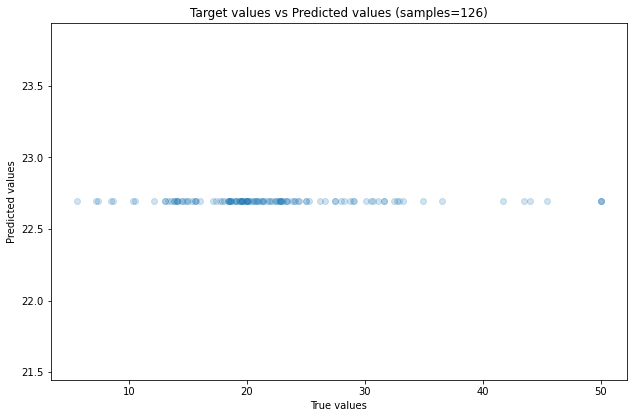

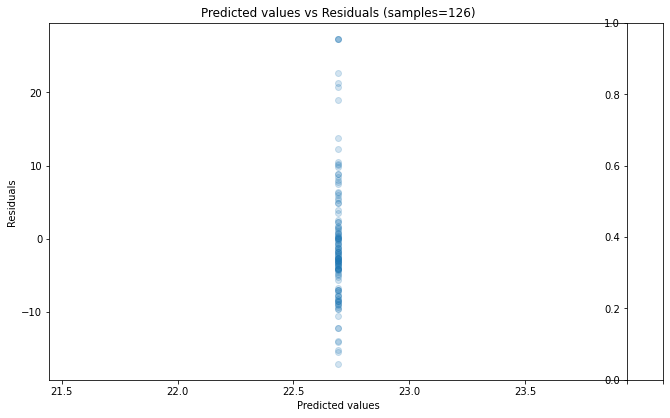

In [47]:
automl = AutoML()
automl.fit(X, y)

In [ ]:
df["predictions"] = automl.predict(X)


In [ ]:
print("Predictions")
print(df[["MEDV", "predictions"]].head())

## Multiclass Classifier - GENERIC

In [ ]:
import pandas as pd
import numpy as np
from supervised.automl import AutoML
import supervised


import warnings

from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from supervised import AutoML
from supervised.exceptions import AutoMLException

# warnings.filterwarnings('error')
warnings.filterwarnings(
    "error", category=pd.core.common.SettingWithCopyWarning
)  # message="*ndarray*")

df = pd.read_csv("https://raw.githubusercontent.com/hantswilliams/HHA-507-2022/main/autoML/datasets/data_classes_iris.csv")
X = df[["feature_1", "feature_2", "feature_3", "feature_4"]]
y = df["class"]



In [ ]:
df

In [ ]:
X

In [ ]:
y.value_counts()

In [ ]:
automl = AutoML()


In [ ]:
automl.fit(X, y)

In [ ]:
predictions = automl.predict_all(X)


In [ ]:
print(predictions.head())
print(predictions.tail())

print(X.shape)
print(predictions.shape)

# Download outputs

In [23]:
# get current working directory
import os
os.getcwd()

'/content'

In [89]:
folders = os.listdir()
foldersML = [x for x in folders if x.startswith('sparcs')]
print(foldersML)

['sparcs_binary_los']


In [90]:
!zip -r /content/sparcs_binary_los.zip /content/sparcs_binary_los

  adding: content/sparcs_binary_los/ (stored 0%)
  adding: content/sparcs_binary_los/Ensemble/ (stored 0%)
  adding: content/sparcs_binary_los/Ensemble/roc_curve.png (deflated 9%)
  adding: content/sparcs_binary_los/Ensemble/precision_recall_curve.png (deflated 11%)
  adding: content/sparcs_binary_los/Ensemble/predictions_ensemble.csv (deflated 62%)
  adding: content/sparcs_binary_los/Ensemble/lift_curve.png (deflated 7%)
  adding: content/sparcs_binary_los/Ensemble/confusion_matrix_normalized.png (deflated 18%)
  adding: content/sparcs_binary_los/Ensemble/calibration_curve_curve.png (deflated 14%)
  adding: content/sparcs_binary_los/Ensemble/cumulative_gains_curve.png (deflated 6%)
  adding: content/sparcs_binary_los/Ensemble/learning_curves.png (deflated 11%)
  adding: content/sparcs_binary_los/Ensemble/confusion_matrix.png (deflated 17%)
  adding: content/sparcs_binary_los/Ensemble/README.md (deflated 68%)
  adding: content/sparcs_binary_los/Ensemble/ensemble.json (deflated 43%)
  a